![](https://drive.google.com/uc?id=11obWVVXPLfBElGh5hXm1QBfqLHLns1ST)

---
**Experiment 3: Linear Time-Inviariant Systems**


---

**Objective:** To understand the LTI properties

**Outcome:**   After successfully completion of this session, the student would be able to  

* Understand the impulse response of a system.
* Understand the properties of linearity and time-invariance.
* Apply above properties to generate system output using convolution.
* Analyze signals in the frequency domain.
* Apply above knowledge in a real-world application.

**Equipment Required:** 
*   A personal computer.
*   Python with NumPy, SciPy, Matplotlib.
*   Speakers

**Components Required:** None


# Introduction

In this laboratory we will be studying the properties of linearity and time-invariance and how we can exploit these properties to calculate the system response using only the input signal and impulse response of the system.

# 1.0 Simulating a System Impulse Response

Impulse response $h[n]$ of a system is the output of a system to an impulse input, $\delta[n]$. First, we shall try to find the impulse response of an accumulator.

## 1.1 Simple example of impulse response: The Accumulator

The accumulator (system) is defined as below. 
\begin{equation*}
y[n] = acc\{x[n]\} \to y[n] =  \sum_{k=-\infty}^n x[k] 
\end{equation*}

In simple terms, the current output of the accumulator is the sum (accumulation) of all the previous inputs up to the current input.

First, begin your implementation by defining the impulse function, $\delta [n]$.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[-5 -4 -3 -2 -1  0  1  2  3  4]


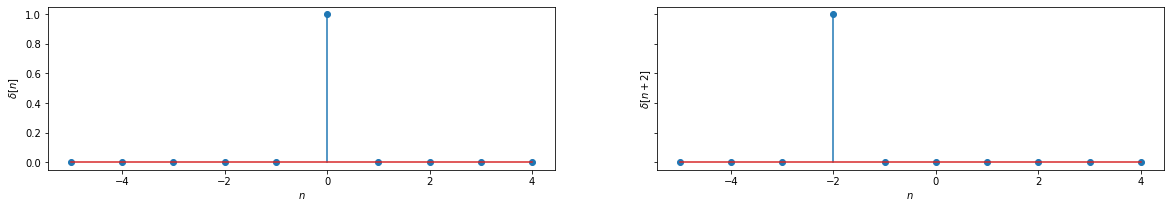

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Define the impulse function
def delta(t):
    x = np.zeros(len(t))
    for i,n in enumerate(t):
        if n == 0:
            x[i] = 1.0
    return x

# Visualize the impulse function
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(20,3))
t = np.arange(-5,5)
x = delta(t)
axes[0].stem(t,x), axes[0].set_xlabel('$n$'), axes[0].set_ylabel('$\delta[n]$')

# shift the delta left by 2
x = delta(t+2)
print(x)
print(t)
axes[1].stem(t,x), axes[1].set_xlabel('$n$'), axes[1].set_ylabel('$\delta[n+2]$')
plt.show()

Complete the function ```accumulator(x)``` below to return an array in which each index contains the accumulation of all previous values in the input array. After that, visualize the output of the accumulator to a delta input (i.e., its impulse response). 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


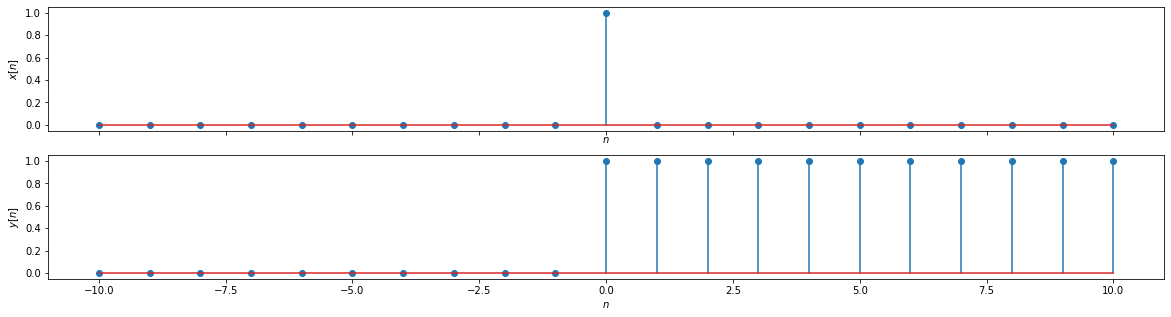

In [22]:
def accumulator(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        # EDIT HERE
        y[i] = y[i-1]+x[i]
    return y

# Visualize impulse response of Accumalator
t = np.arange(-10., 11.)
x = delta(t) # EDIT HERE
y = accumulator(x)

fig, axes  = plt.subplots(2,1, sharex='all', sharey='all', figsize=(20,5))
axes[0].stem(t,x), axes[0].set_xlabel('$n$'), axes[0].set_ylabel('$x[n]$')
axes[1].stem(t,y), axes[1].set_xlabel('$n$'), axes[1].set_ylabel('$y[n]$')
plt.show()

Implement an ‘accumulator with decay’ and plot its impulse response. The accumulator with decay is defined as below. 

\begin{equation*}
y[n] = \sum_{n=-\infty}^{n} x[k] e^{-0.5[n-k]}
\end{equation*}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


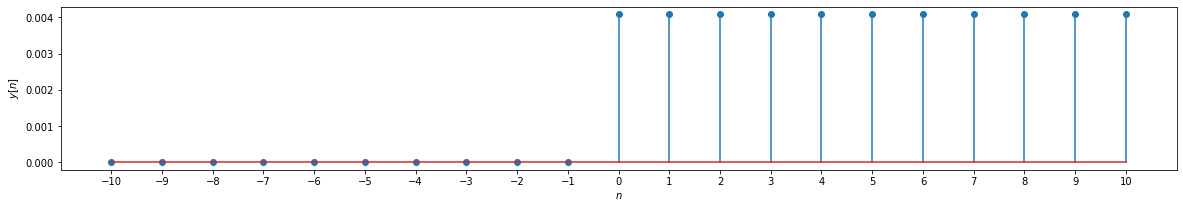

In [23]:
# cell [2]

def accumulator_decay(x):
    y = np.zeros(len(x))
    for i in range(len(x)):
        # EDIT HERE
        y[i] = y[i-1]+(x[i]*np.exp(-0.5*abs(i-len(y))))
    return y

x = delta(t)
y = accumulator_decay(x)

fig, ax  = plt.subplots(figsize=(20,3))
ax.stem(t,y), ax.set_xlabel('$n$'), ax.set_ylabel('$y[n]$')
ax.set_xticks([i for i in range(-10, 11, 1)])
plt.show()

Construct the following signal $x[n]$ using the ```delta(t)``` function.

![](https://drive.google.com/uc?export=view&id=1Lyblke6EeRjE19Ploj_F1YxzV2IS__L4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


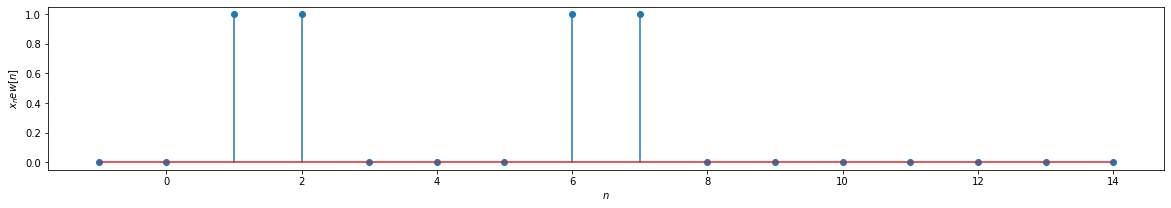

In [25]:
# cell [3]

n_x = np.arange(-1., 15.)
# EDIT HERE
x_new =delta(n_x-1)+delta(n_x-2)+delta(n_x-6)+delta(n_x-7)

fig, axes  = plt.subplots(figsize=(20,3))
axes.stem(n_x,x_new), axes.set_xlabel('$n$'), axes.set_ylabel('$x_new[n]$')
plt.show()

Now plot the response of the "accumulator with delay" system to the above input.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


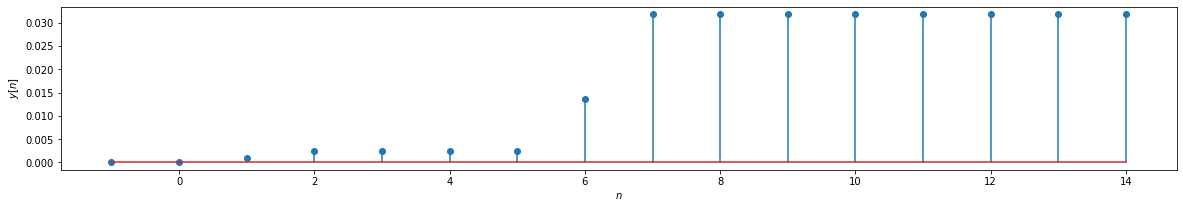

In [26]:
# cell [4]

y = accumulator_decay(x_new)

fig, axes  = plt.subplots(figsize=(20,3))
axes.stem(n_x,y), axes.set_xlabel('$n$'), axes.set_ylabel('$y[n]$')
plt.show()

$\color{red}{\text{Please show your work up to this point to an instructor and get it marked}}$

# 2.0 Understanding linearity

A linear system (continous time or discrete time), is a system a that possesses the important property of superposition. The superposition property encompasses the characteristics of additivity and homogeneity (scaling). This can be mathematically expressed as follows.

Let $y_1[n]$ be the response of a discrete-time system to an input $x_1[n]$, and let $y_2[n]$ be the response corresponding to the input $x_2[n]$. Then, the system is linear if, 

* The response to $x_1[n] + x_2[n]$ is $y_1[n] + y_2[n]$ (additivity),
* The response to $ax_1[n]$ is $ay_1[n]$, where $a$ is any complex constant (homogeneity)

Additivity and homogeneity can be expressed together as follows. Let $x_1[n]$ and $x_2[n]$ be the inputs to a system $S$. We say that the system $S$ is linear, if 

$$S\{ax_1[n] + bx_2[n]\} = aS\{x_1[n]\} + bS\{x_2[n]\}$$

where, $a$ and $b$ are complex constants.

Let's determine whether the accumulator obeys the property of linearity.


## 2.1 A Simple Example of a Linear System: The Accumulator

First, visualize the response of the accumulator to the inputs $x_1[n] = \delta[n]$ and $x_2[n] = \delta[n+2]$


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. T

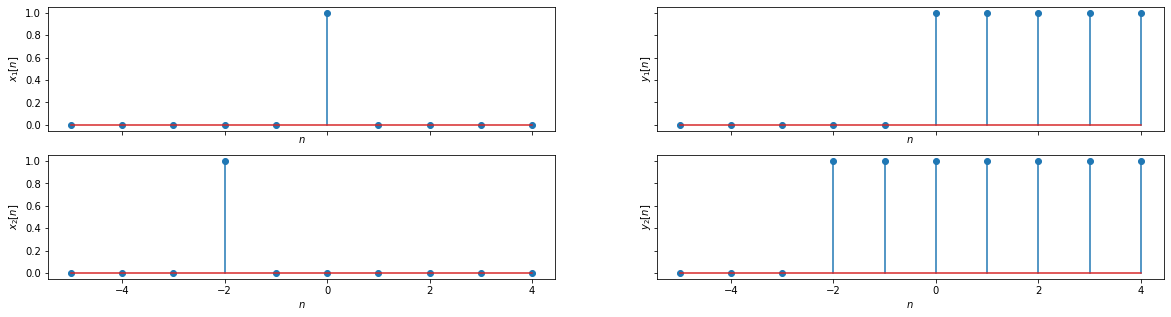

In [27]:
# cell [5]

t = np.arange(-5., 5.)
x1 = delta(t)
x2 = delta(t+2)

y1 = accumulator(x1)
y2 = accumulator(x2)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(20,5))
axes[0,0].stem(t,x1), axes[0,0].set_xlabel('$n$'), axes[0,0].set_ylabel('$x_1[n]$')
axes[0,1].stem(t,y1), axes[0,1].set_xlabel('$n$'), axes[0,1].set_ylabel('$y_1[n]$')
axes[1,0].stem(t,x2), axes[1,0].set_xlabel('$n$'), axes[1,0].set_ylabel('$x_2[n]$')
axes[1,1].stem(t,y2), axes[1,1].set_xlabel('$n$'), axes[1,1].set_ylabel('$y_2[n]$')
plt.show()

Now, in the following cell, plot the following signals :

$$s_1[n] = a \times acc\{x_1[n]\} + b \times acc\{x_2[n]\}$$
$$s_2[n] = acc\{a x_1[n] + b x_2[n]\}$$ 

Here, "$acc\{ . \}$" denotes the ```accumulator(x)```
function.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


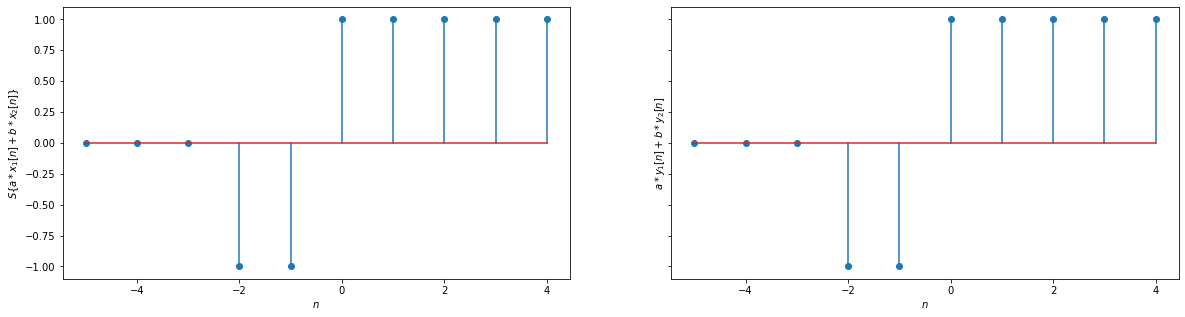

In [28]:
# cell [6]

a = 2
b = -1

# EDIT HERE
s1 = a*accumulator(x1)+b*accumulator(x2)
s2 = accumulator(a*x1+b*x2)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(20,5))
axes[0].stem(t,s1), axes[0].set_xlabel('$n$'), axes[0].set_ylabel('$S\{a*x_1 [n] + b*x_2 [n]\}$')
axes[1].stem(t,s2), axes[1].set_xlabel('$n$'), axes[1].set_ylabel('$a*y_1 [n] + b*y_2 [n]$')
plt.show()

### Comment your observations below. Based on your observations, discuss the linearity of the accumulator system.

<--type-in your answer here-->

## 2.2 A Simple Example of a Non-Linear System: The Squarer

In [ ]:
# cell [7]

def square(x):
    return np.multiply(x,x)

x1 = np.ones(5)
x2 = 2*np.ones(5)
a = 2
b = -1

print(a*square(x1) + b*square(x2))
print(square(a*x1 + b*x2))


### Discuss your observations about the output of the above cell.

<--type-in your answer here-->

In [40]:
# cell [7]

def square(x):
    #return 3*x+1
    return np.multiply(x,np.multiply(x,x))

x1 = np.ones(5)
x2 = 2*np.ones(5)
a = 2
b = -1

print(a*square(x1) + b*square(x2))
print(square(a*x1 + b*x2))


[-6. -6. -6. -6. -6.]
[0. 0. 0. 0. 0.]


### Determine whether the following functions (systems) are linear :

* $y = 3x + 1$
* $y = x^3$


<--type-in your answer here-->

$\color{red}{\text{Please show your work up to this point to an instructor and get it marked}}$

# 3.0 Understanding Time-Invariance

We call that a system (continuous time or discrete time) is time-invariant if the behavior or the characteristics of the system are fixed over time. Specifically, a system is time-invariant if a time-shift in the input signal results in an identical time-shit in the output signal. This can be expressed using the following mathematical statement.

Let $x[n]$ be an input to the system $S$. We say that the system, $S$ is time-invariant if the following condition is met :

$$S\{x[n]\} = y[n] \implies S\{x[n-n_0]\} = y[n-n_0]$$ 


## 3.1 A Simple Example of a Time-Invariant System: The Accumulator

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

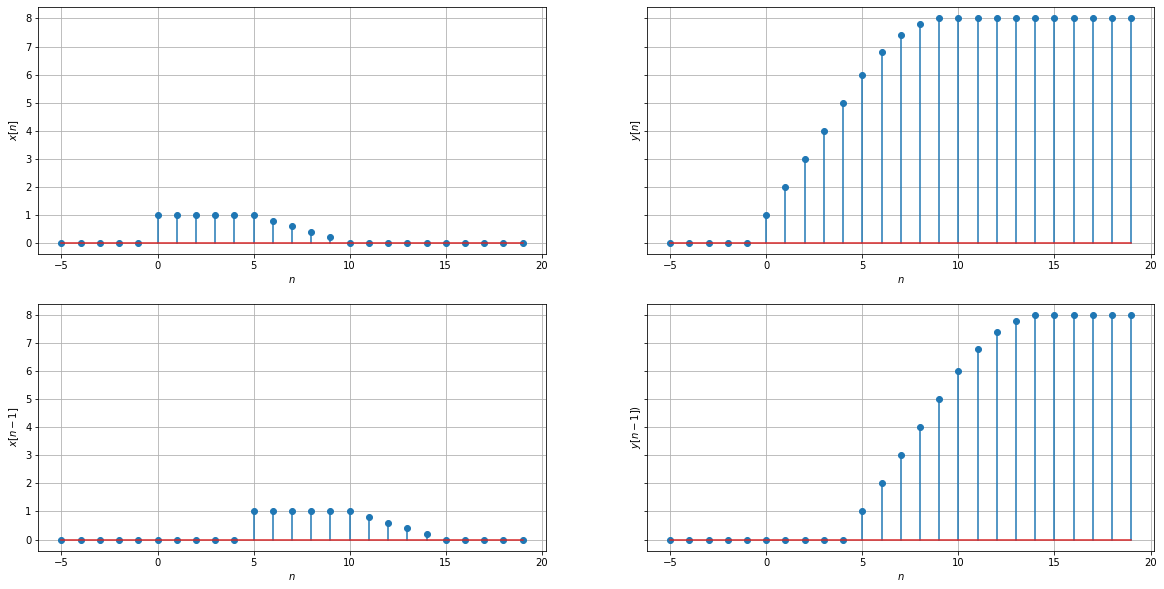

In [30]:
# cell [8]

def function1(t):
    if (t < 0.):
        return 0.
    elif (t < 5.):
        return 1.
    elif (t < 10.):
        return 2. - 0.2*t
    else:
        return 0.

t = np.arange(-5, 20, 1) 
fig, axes  = plt.subplots(2,2, sharey='all', figsize=(20,10))

# x(t)
x_t = [function1(t_) for t_ in t]
axes[0,0].stem(t, x_t) 
axes[0,0].set_xlabel('$n$'), axes[0,0].set_ylabel('$x[n]$'), axes[0,0].grid(True)
# y(t)
y_t = accumulator(x_t)
axes[0,1].stem(t, y_t) 
axes[0,1].set_xlabel('$n$'), axes[0,1].set_ylabel('$y[n]$'), axes[0,1].grid(True)

# x(t - 5)
x_t_1 = [function1(t_ - 5) for t_ in t]
axes[1,0].stem(t, x_t_1)
axes[1,0].set_xlabel('$n$'), axes[1,0].set_ylabel('$x[n-1]$'), axes[1,0].grid(True)

# y(t - 1)
y_t_1 = accumulator(x_t_1)
axes[1,1].stem(t, y_t_1)
axes[1,1].set_xlabel('$n$'), axes[1,1].set_ylabel('$y[n-1])$'), axes[1,1].grid(True)

plt.show()

### Discuss your observations about the output of the cell above.

<--type-in your answer here-->

## 3.2 Simple Example of a Time-Variant System: The Modulator

Conisder the modulator system defined below. 

$$y[n] = \sin(\frac{\pi}{5} n) x[n]$$

Implement the modulator function in the cell below and observe the cell outputs.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

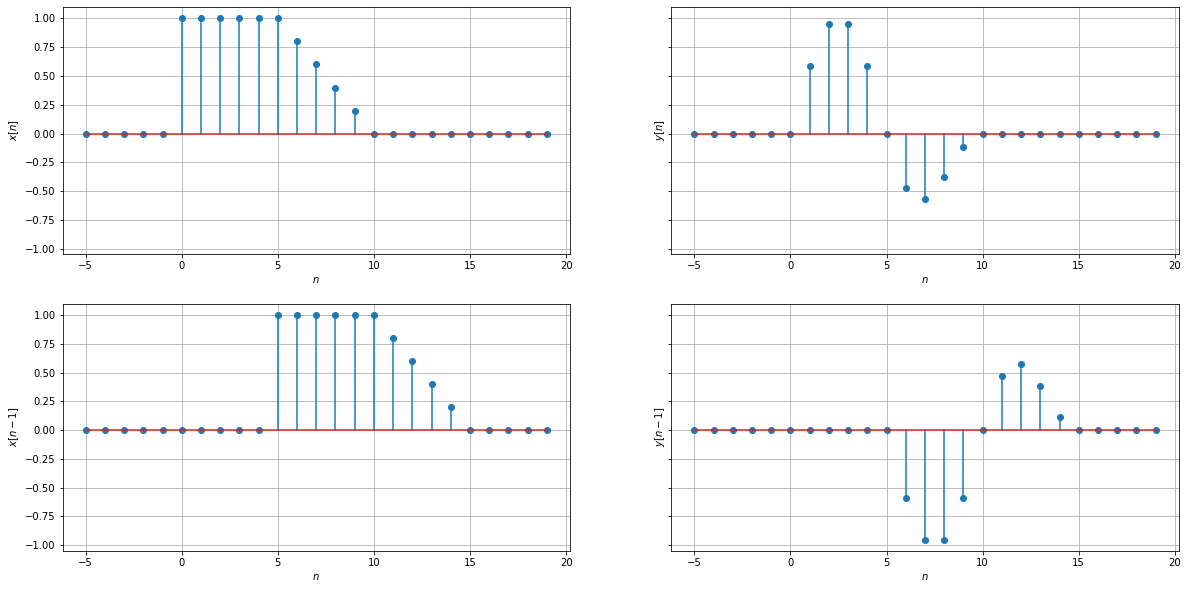

In [37]:
# cell [9]

def modulator(x_t,t):
    # t    : Vector with time values. Refer code below. 
    # x_t  : x(t) input. Same dimensions as t. 
    y=np.zeros(len(t))

    # EDIT HERE
    for i in range(len(t)):
      y[i]=np.sin(np.pi*t[i]/5)*x_t[i]
    return y

t = np.arange(-5, 20, 1) 
 
fig, axes  = plt.subplots(2,2, sharey='all', figsize=(20,10))

# x[n]
x_t = [function1(t_) for t_ in t]
axes[0,0].stem(t, x_t) 
axes[0,0].set_xlabel('$n$'), axes[0,0].set_ylabel('$x[n]$'), axes[0,0].grid(True)

# y[n]
y_t = modulator(x_t,t)
axes[0,1].stem(t, y_t) 
axes[0,1].set_xlabel('$n$'), axes[0,1].set_ylabel('$y[n]$'), axes[0,1].grid(True)

# x[n - 5]
x_t_1 = [function1(t_ - 5) for t_ in t]
axes[1,0].stem(t, x_t_1)
axes[1,0].set_xlabel('$n$'), axes[1,0].set_ylabel('$x[n-1]$'), axes[1,0].grid(True)

# y[n - 1]
y_t_1 = modulator(x_t_1,t)
axes[1,1].stem(t, y_t_1)
axes[1,1].set_xlabel('$n$'), axes[1,1].set_ylabel('$y[n-1]$'), axes[1,1].grid(True)

plt.show()

### Explain your observations about the output of the cell above.

<--type-in your answer here-->

### Determine whether the following functions (systems) are time-invariant.

* $y(t) = \frac{x(t)}{t+1}$
* $y(t) = x(t)e^{-3t}$

<--type-in your answer here-->

$\color{red}{\text{Please show your work up to this point to an instructor and get it marked}}$

# 4.0 Understanding Convolution

In this section we will be exploiting the properties of linearity and time-invariance to generate the system output using only the input signal and system impulse response. This process is referred to as convolution. 

Decompose $x[n]$ into a sum of individual components:
\begin{equation*}
x[n] =  \sum_{k=-\infty}^\infty x[k] \delta[n-k] 
\end{equation*}

If $ h[n] $ is the system reponse to an impulse $ \delta[n] $, then the system output to input $x[n]$ can be decomposed as follows:
\begin{equation*}
y[n] =  \sum_{k=-\infty}^\infty x[k] h[n-k] \\
y[n] = x[n] * h[n]
\end{equation*}


## 4.1 Visualizing Convolution of Two Rectangular Functions

Consider the convolution of two rectangular functions. 

$$y(t) = rect(t)*rect(t)$$

First, let's define two rectangular functions using the following cell.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


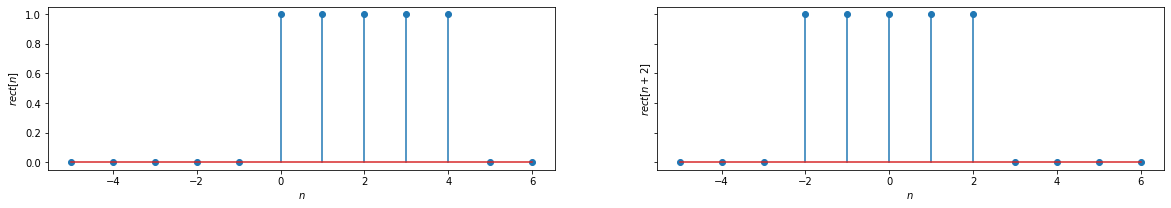

In [43]:
# cell [10]

def rect(t,w):
    x = np.zeros(len(t))
    for i,n in enumerate(t):
        if n >= 0 and n < w:
            x[i] = 1.0
    return x

# Visualize rect function
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(20,3))
t = np.arange(-5,7)
x1 = rect(t,5)
axes[0].stem(t,x1), axes[0].set_xlabel('$n$'), axes[0].set_ylabel('$rect[n]$')

# shift the rect left by 2
x2 = rect(t+2,5)
axes[1].stem(t,x2), axes[1].set_xlabel('$n$'), axes[1].set_ylabel('$rect[n+2]$')
plt.show()

Using the ```conv_sum(x1, t1, x2, t2)``` function, obtain the convolution of the above two functions and plot it.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


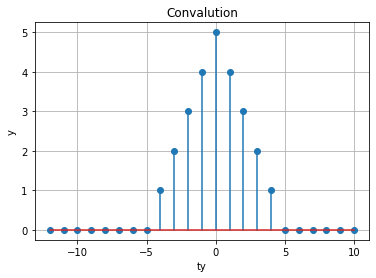

In [57]:
# cell [11]

def conv_sum(x1,t1,x2,t2):
    ty = np.arange(0,len(x1)+len(x2)-1) + t1[0]+t2[0]
    y = np.convolve(x1, x2)
    return y,ty

print(y)
# EDIT HERE
y,ty=conv_sum(x1,t,x2,t-2)
plt.stem(ty,y)
plt.grid()
plt.xlabel("ty")
plt.ylabel("y")
plt.title("Convalution")
plt.show()


## 4.2 Visualizing Convolution Step by Step

Convolution requires the kernel function $h[k]$ to be reflected about the y-axis ($h[−k]$) and then shifted along the x-axis.

($h[n − k]$) Observe the code in cell below and comment on the functions of ```ref(t,x)``` and ```array_shift(t1,t2,x,s)```.

$$y(t) = rect(t)*rect(t)$$

Edit the following cell as explained in the comments and run. Press ‘Enter’ for the next step.

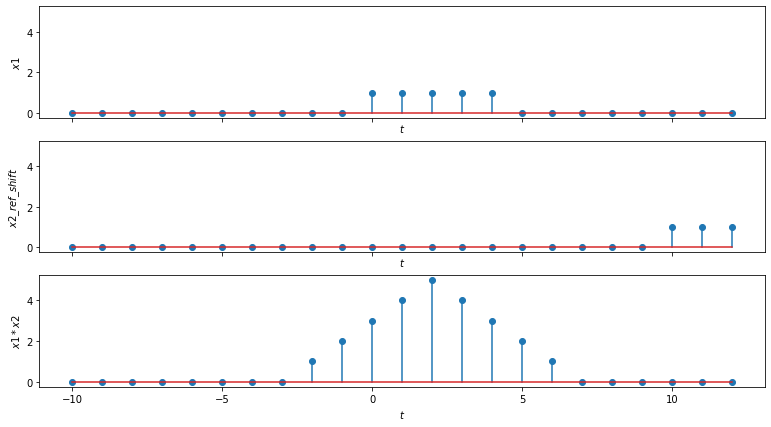

Press Enter to continue...


In [63]:
# cell [12]

import numpy as np
import matplotlib.pyplot as plt
from IPython import display

def rect(t,w):
    # Returns of square of width 'w' starting from t=0 for time array 't'. 
    
    x = np.zeros(len(t))
    for i,n in enumerate(t):
        if n >= 0 and n < w:
            x[i] = 1.0
    return x

def ref(t,x):
    # Reflects x about the y axis. 
    
    y = np.zeros(len(t))
    for i,n in enumerate(t):
        try:
            ind = int(np.where(t==-n)[0])
            y[i] = x[ind]
        except:
            pass
    return y

def plot_arr(t1,t2,x):
    # Helper function needed for comparative plotting.
    # x is the function with time vector t1.
    # Returns y, which is x with time vector t2. 
    
    y = np.zeros(len(t2))
    for i,n in enumerate(t2):
        try:
            ind = int(np.where(t1==n)[0])
            y[i] = x[ind]
        except:
            pass
    return y


def array_shift(t1,t2,x,s):
    # Shifts the function by step 's' in the time axis.
    # Adjusts time vector from t1 to t2. 
    
    y = np.zeros(len(t2))
    for i,n in enumerate(t2):
        ind2 = n - s
        try:
            ind1 = int(np.where(t1==ind2)[0])
            y[i] = x[ind1]
        except:
            pass
    return y

# Input functions and their time arrays. 
t1 = np.arange(-5,7)
x1 = rect(t1,5)
t2 = np.arange(-5,7)
x2 = rect(t2+2,5)

# Define output time array for visualization
ty = np.arange(0,len(x1)+len(x2)-1) + t1[0]+t2[0]

#  EDIT HERE
# Obtain x1[k] by adjusting the time vector of x1 to ty. Hint: 'plot_arr' function. 
x1_k = plot_arr(t1,ty,x1)
# Obtain x2[-k] by reflecting x2 about the y axis. Hint: 'ref' function. 
x2_ref = ref(t1,x2)

y = np.zeros(len(ty))

for i in range(len(ty)):
    # Calculate x2[n-k] by shifting x2_ref along x-axis. 
    x2_ref_shift = array_shift(t2,ty,x2_ref,ty[i])
    
    # Calculate the dot product of x1[k] and x2[n-k]. Change the d variable here
    d = np.dot(x2_ref_shift,x1_k)
    y[i] = d
    
    fig, axes  = plt.subplots(3,1, sharex='all', sharey='all', figsize=(13,7))
    axes[0].stem(ty,x1_k), axes[0].set_xlabel('$t$'), axes[0].set_ylabel('$x1$')
    axes[1].stem(ty,x2_ref_shift), axes[1].set_xlabel('$t$'), axes[1].set_ylabel('$x2\_ref\_shift$')
    axes[2].stem(ty,y), axes[2].set_xlabel('$t$'), axes[2].set_ylabel('$x1 * x2$')

    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.show()
    
    input("Press Enter to continue...")
    

$\color{red}{\text{Please show your work up to this point to an instructor and get it marked}}$


# 5.0 Signal processing in the Frequency Domain
 
Discrete time Fourier Transform of  $x[n]$ can be obtained as follows:
\begin{equation*}
X[\Omega] = \sum_{n=-\infty}^\infty x[n] e^{-j \Omega n}
\end{equation*}

Convolution in the time domain is equivalant to multiplication in the frequency domain:
\begin{equation*}
x[n] * h[n] = \mathcal{F}^{-1}\{ X[\Omega] \times H[\Omega] \}
\end{equation*}


## 5.1 Observing two signals in the Frequency Domain

Obtain the following signals and visualize them in the frequency domain by running the cell below.

* $x_1[n] = \cos(\omega n) + \cos(3\omega n)$
* $x_2[n] = 0.5 + \cos(3\omega n)$

$$x_1[n] \to X_1(\Omega)$$
$$x_2[n] \to X_2(\Omega)$$


In [ ]:
# cell [13]

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-100., 100., 1) 
f = 1/100 # 0.01 Hz
omega = 2*np.pi*f

# EDIT HERE
x1_n = 0
x2_n = 0

# Obtain frequency domain representations of x1[n] and x2[n]
X1_f = np.fft.fft(x1_n)
X2_f = np.fft.fft(x2_n)

# Visualize
freq = np.fft.fftfreq(n.shape[-1], d=1)
valsubrange = np.concatenate((np.arange(0,9,1), np.arange(-1,-9,-1)))
freqsubrage = np.concatenate((np.arange(0,9,1), np.arange(-1,-9,-1)))
fig, axes  = plt.subplots(2,2, sharey='all', figsize=(20,10))

# x1[n]
axes[0,0].plot(n,x1_n) 
axes[0,0].set_xlabel('$t$'), axes[0,0].set_ylabel('$x1(t)$'), axes[0,0].grid(True)

# X1(jw)
axes[0,1].stem(freq[freqsubrage], X1_f.real[valsubrange]/len(n))
axes[0,1].set_xlabel('$f$ (Hz)'), axes[0,1].set_ylabel('$\mathfrak{Re}(X1(j\omega))$'), axes[0,1].grid(True)

# x2[n]
axes[1,0].plot(n,x2_n)
axes[1,0].set_xlabel('$t$'), axes[1,0].set_ylabel('$x2(t)$'), axes[1,0].grid(True)

# X2(jw)
axes[1,1].stem(freq[freqsubrage], X2_f.real[valsubrange]/len(n))
axes[1,1].set_xlabel('$f$ (Hz)'), axes[1,1].set_ylabel('$\mathfrak{Re}(X2(j\omega))$'), axes[1,1].grid(True)

plt.show()


## 5.2 Covolution of above Signals by Multiplication in the Frequency Domain

Edit the following cell to multiply the two signals in frequency domain.

$$x_1[n] * x_2[n] \to X_1(\Omega) \times X_2(\Omega)$$

In [ ]:
# cell [14]

# Multiply the frequency domain representations of x1[n] and x2[n]
# EDIT HERE
X1_X2_f = <-->

# Take inverse fft to visualize in time domain
z = np.fft.ifft(X1_X2_f).real
fig2, axes2  = plt.subplots(1,2, sharey='all', figsize=(20,5))
axes2[0].plot(n, z, label='$z[n]$')

z_f = np.fft.fft(z)
axes2[1].stem(freq[freqsubrage], z_f.real[valsubrange]/len(n))

Explain the observations you made in the above cell output.

<--type-in your answer here-->

$\color{red}{\text{Please show your work up to this point to an instructor and get it marked}}$


# 6.0 A Real-world Application (Equalizer)

Equalizing in audio engineering refers to manipulating the frequency components of an audio to get a desirable output. Specifically, equalizing is used to boost or suppress the energy (amplitude) of different frequency components, which may correspond to a specific sound source.

Equalizers are the devices that enable this equalization process. The controllers on the device enable adjustment of gain (boost) given to each frequency band that is present in the audio.

In this section we will look into a simple non-real-time implementation of an equalizer, using a filter bank. The filter bank consists of 10 filters, which separates out the audio input signal into 10 equal-width frequency bands. By adjusting the gain applied for each filter, we are able to control the boost given to the aforementioned frequency bands in the audio signal


Run cell [[15]] to load the “africa-toto.wav” file and create a ```PyAudio``` stream. ```PyAudio``` is used to play the loaded wav file. This cell also defines some variables such as ```n_channels```, ```fs``` and chunk that will be used in the following cells. Note that ```fs``` is the sample rate of the audio.

In [ ]:
# cell [15]

import numpy as np
import pyaudio
import wave
from scipy.fftpack import fft, fftshift, ifft
from scipy import signal
import scipy.io.wavfile as sw
import matplotlib.pyplot as plt
import struct

# set up to read an audio file

# open wav file
wf = wave.open("./africa-toto.wav", 'rb')
# wf = wave.open("./africa-toto.wav", 'rb')
# wf = wave.open("./symphony-orchestra-tuning.wav", 'rb')

channels=wf.getnchannels()
dtype = '<i2' # little-endian two-byte (int16) signed integers 

n_channels=wf.getnchannels() # no. of chennels in the audio
fs = wf.getframerate() # frame rate of audio 
chunk = fs # no. of audio frames played at a time

# instantiate PyAudio (for playing the sound track)
p = pyaudio.PyAudio()

# open stream (for playing the sound track)
stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=n_channels,
                rate=fs,
                output=True)

Cell [[16]] plays the audio and collects the audio samples as numerical values to the numpy array ```x```. Variables ```start``` and ```dur``` describe the audio segment that we use in our experiment from the original wav file.

In [ ]:
# cell [16]

# reading the audio file

start = 200 # audio starting time frame (s)
dur = 10 # duration selected (s)

wf.rewind() # reset readframe positin to the begining of the file
wf.setpos(wf.tell()+start*fs) # seek to the needed starting position

x = np.array([]) # initialize audio signal array
for i in range(0, dur):
    data = wf.readframes(chunk) # read an audio frame chunk
    if data == '': # if the audio samples ended
        break
    sig_chunk = np.asarray(np.frombuffer(data, dtype=dtype)) # convert the frame chunk into a numpy array
    x = np.concatenate((x, sig_chunk)) # add the signal chunk to the signal array
    stream.write(data) # play the audio chunk

Cell [[17]] generates a time domain visualization of the audio segment played. Examine the variables defined in the cell and identify their significance.

In [ ]:
# cell [17]

# ploting original audio in time domain

N = len(x) # number of audio samples (frames)
T = 1/fs # time interval between frames
t = np.linspace(0.0, N*T, N) # time axis for audio

# plot original audio in time doamin
fig, ax = plt.subplots(1, 1, figsize=(18,9))
ax.grid(True)
ax.plot(t, x, 'y')
ax.xlabel('t (s)')
plt.show()

Cell [[18]] generates a frequency domain visualization of the audio segment played. Examine the variables defined in the cell and identify their significance. Observe the frequency distribution for the audio sample played.

In [ ]:
# cell [18]

# ploting original audio in frequency domain 

f = np.linspace(-fs/2, fs/2+1, N) # frequency axis for audio
xf = np.fft.fft(x) # fft command converts x into the fourier domain (X)

n_filters = 10 # no. of filters (to be ued in the filter bank in the equalizer)
fc_list = np.linspace(0, fs/2+1, n_filters+1) # cutoff frequencies for the filters in filter bank

fig, ax = plt.subplots(1, 1, figsize=(18,9))
ax.grid(True)
ax.plot(f[N//2:], 2.0/N * np.abs(xf[0:N//2]))
yy = np.arange(0, ax.get_ylim()[1])
xx = np.ones(yy.shape)
for fc in fc_list:
    ax.plot(fc*xx, yy, 'k--')
ax.xlabel('f (Hz)')
plt.show()

In cell [[19]], complete the function ```ideal_filter(f, fc1, fc2)``` that returns the gain for given frequency input ```f```, in a filter defined by the cut-off frequencies ```fc1```, ```fc2```. Assume these cut-off frequencies are the two limits of a passband.

$$
H(f) = 
\begin{cases}
    1, & \text{if } f_{c1} < |f| < f_{c2} \\
    0,              & \text{otherwise}
\end{cases}
$$

In cell [[19]] , complete the function ```equalizer(H, gains, sig)``` to create the equalizer. The equalizer takes in the filter bank ```filter_bank```, the corresponding gains gains and the audio signal to be equalized ```sig``` as inputs. Attribute each gain to the corresponding filter and then filter the input signal using the modified filters. Then obtain the desired equalized signals by combining the outputs of each filter in the modified filter bank. **Do not** use loops to complete the function.


In [ ]:
# cell [19]

# ideal filter

def ideal_filter(f, fc1, fc2):    
    gain = 0
    #  EDIT HERE
    return gain

# equalizer
def equalizer(filter_bank, gains, sig):
    
    filter_bank = np.array(filter_bank)
    gains = np.array(gains)
    # EDIT HERE
            
    return equilized_sig 

Cell [20] creates the filter bank consisting 10 filters, which are defined by the cut off frequencies in ```fc_list``` (refer to cell [8]).

In [ ]:
# cell [20]

# filter bank

filter_bank = []
for i in range(n_filters):
    H_i = [ideal_filter(f_, fc_list[i], fc_list[i+1]) for f_ in f] # filter with ith & (i+1)th cut off frequencies
    filter_bank.append(H_i)

Cell [21] creates the list of gains ```gains``` that are to be attributed to each filter in the filter bank. Change the values in this list to change the gains provided to each frequency band in the audio sample.

In [ ]:
# cell [21]

# equalizer gains
gains = [0.5, 0, 0, 0, 5, 0, 0, 0, 1, 1] # CHANGE HERE
gains = np.array(gains).reshape([len(gains), 1])


Run cell [22] to equalize the audio sample with the assigned gains. Then run cell [23] to visualize the equalized audio sample in the frequency domain.

In [ ]:
# cell [22]

# equalize audio

equilized_sig = equalizer(filter_bank, gains, np.fft.fftshift(xf))

In [ ]:
# cell [23]

# visualize equalized signal in frequancy domain

fig, ax = plt.subplots(1, 1, figsize=(18,9))
ax.grid(True)
ax.plot(f[N//2:], 2.0/N *np.abs(np.fft.fftshift(equilized_sig)[0:N//2]))
yy = np.arange(0, ax.get_ylim()[1])
xx = np.ones(yy.shape)
for fc in fc_list:
    ax.plot(fc*xx, yy, 'k--')
ax.xlabel('f (Hz)')
plt.show()

Run cell [24] to play the equalized audio sample.

In [ ]:
# cell [24]

# play equalized audio

equi_audio = np.fft.ifft(np.fft.fftshift(equilized_sig)) # convert to time domain
z_int16 = equi_audio.astype(np.int16)   
z_byte  = z_int16.tobytes()
stream.write(z_byte)

Change the gain attributed to each band by modifying ```gains``` array in cell [21] and
observe the changes in the audio.

# References

[[1]] Oppenheim, A. V., Willsky, A. S., & Young, I. T. (1983). Signals and systems. Englewood Cliffs, N.J: Prentice-Hall.